## Engr 1330 - Computational Thinking and Data Science Spring 2022
# Concrete Strength Predictor Final Project


In [1]:
#Importing all the libraries 
import numpy as np
import pandas as pd
import statistics 
import math
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exploratory Data Analysis

In [4]:
#making a dataframe of the csv file
df = pd.read_excel("concreteData.xls")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
#Getting the information (i.e, the number of rows and the data types present in each column) and the basic statistical measures 

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   water                                                  1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   coarse aggregate                                       1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   ccs                                              

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),water,Superplasticizer (component 5)(kg in a m^3 mixture),coarse aggregate,Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),ccs
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.rename(columns = {"Cement (component 1)(kg in a m^3 mixture)":"cement",
                            "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"blast furnace",
                            "Fly Ash (component 3)(kg in a m^3 mixture)":"flyash",
                            "Superplasticizer (component 5)(kg in a m^3 mixture)":"superplasticizer",
                            "Fine Aggregate (component 7)(kg in a m^3 mixture)":"fine aggregate"}, inplace = True)
df

,cement,blast furnace,flyash,water,superplasticizer,coarse aggregate,fine aggregate,Age (day),ccs
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


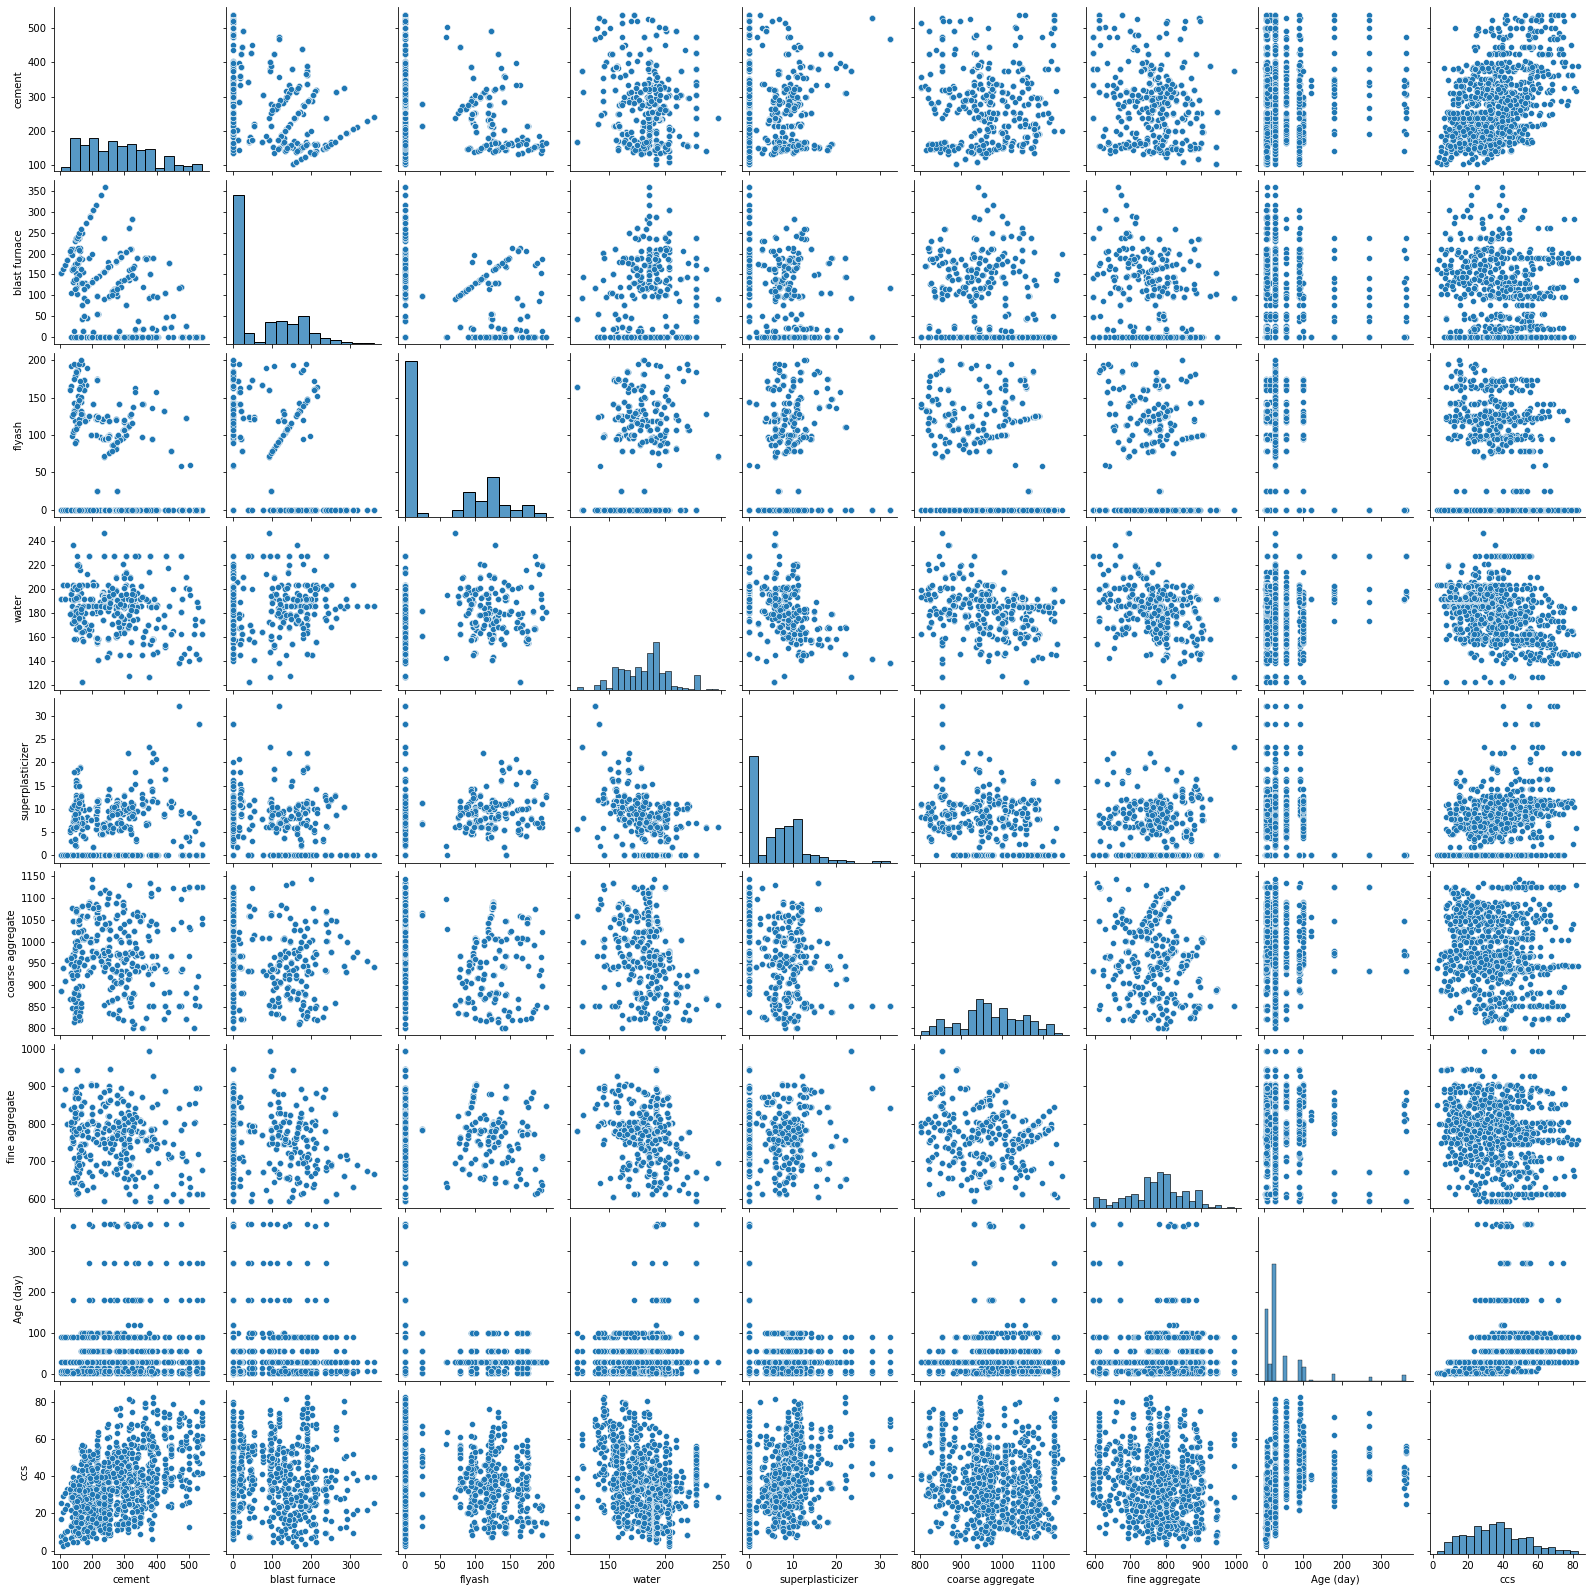

In [5]:
#making a pairplot of the database
sns.pairplot(df)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

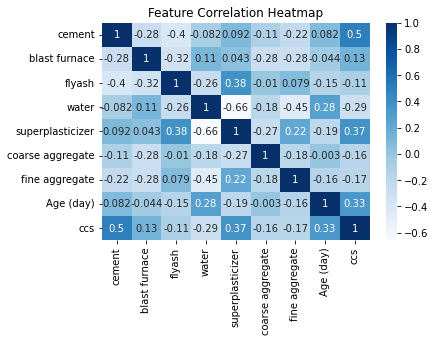

In [6]:
#Computing the correlation coefficient between all the columns in the dataset and displaying them as a heat map

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")

so the three main variables having significant correlation is 'cement', 'superplasticizer' and 'age'

# Multiple Linear Regression

In [7]:
x = ['cement' , 'superplasticizer' , 'Age (day)']
X = df[x]
Y = df['ccs']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

print("the coeff are",lm.coef_)
print("the intercept is ",lm.intercept_)

the coeff are [0.06512375 1.12974345 0.10051921]
the intercept is  6.1640792294885


Text(0.5, 1.0, 'Predictions vs. actual values in the training set')

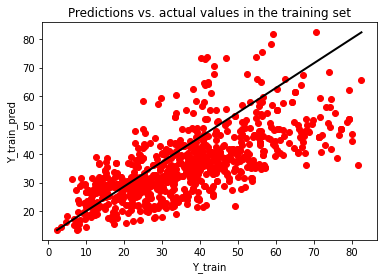

In [10]:
#Testing the model on the training set
y_train_pred = lm.predict(X_train)

plt.scatter(y_train,y_train_pred,color='r')
plt.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_train")
plt.ylabel("Y_train_pred")
plt.title("Predictions vs. actual values in the training set")

Text(0.5, 1.0, 'Predictions vs. actual values in the test set')

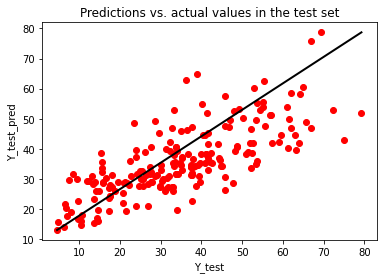

In [11]:
#Testing the model on the test set

y_test_pred = lm.predict(X_test)

plt.scatter(y_test,y_test_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color = 'black', lw=2)
plt.xlabel("Y_test")
plt.ylabel("Y_test_pred")
plt.title("Predictions vs. actual values in the test set")

In [12]:
#Computing the MSE and the RMSE values for the predictions made on the training set

from sklearn import metrics

RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print("the root mean square error of the predictions made on training set is",RMSE_train)

#Computing the MSE and the RMSE values for the predictions made on the test set

RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("the root mean square error of the predictions made on test set is",RMSE_test)

the root mean square error of the predictions made on training set is 12.29935377579937
the root mean square error of the predictions made on test set is 10.886913416499546


In [13]:
import sklearn.metrics
y_pred = lm.predict(X)
sklearn.metrics.r2_score(Y, y_pred)

0.48092316516994393

# Exponential Data Model

In [14]:
Y = np.log(Y)
X = sm.add_constant(X)
mod = sm.OLS(Y, X)
mod = mod.fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    ccs   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     275.9
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          2.81e-131
Time:                        12:13:57   Log-Likelihood:                -543.00
No. Observations:                1030   AIC:                             1094.
Df Residuals:                    1026   BIC:                             1114.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.4860      0.039  

# Power-Law Model

Text(0.5, 1.0, 'Cement vs Cement compressive strength')

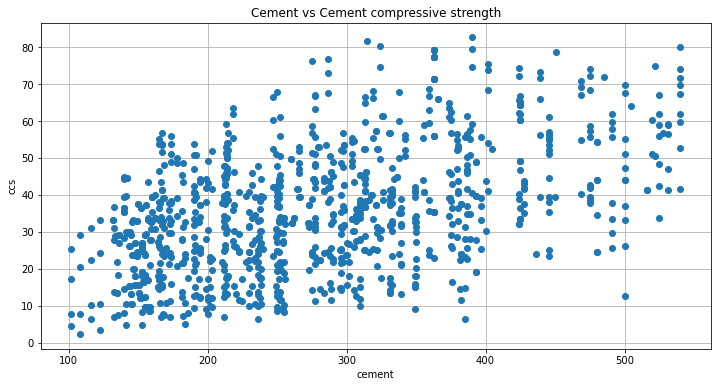

In [15]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(df['cement'], df['ccs'], marker='o', linewidth=0)          # scatter plot showing actual data
plt.xlabel('cement')
plt.ylabel('ccs')
#plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title("Cement vs Cement compressive strength")

In [16]:
df['lnX']=df['cement'].apply(math.log)
df['lnY']=df['ccs'].apply(math.log)
df.head()

,cement,blast furnace,flyash,water,superplasticizer,coarse aggregate,fine aggregate,Age (day),ccs,lnX,lnY
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,6.291569,4.381902
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,6.291569,4.125359
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,5.806640,3.695607
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,5.806640,3.714791
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,5.291293,3.790985


Text(0.5, 1.0, 'Cement vs Cement compressive strength')

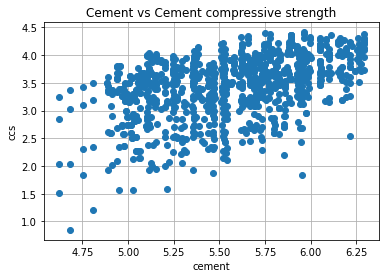

In [17]:
plt.plot(df['lnX'], df['lnY'], marker='o', linewidth=0)           # scatter plot showing actual data
plt.xlabel('cement')
plt.ylabel('ccs')
#plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title("Cement vs Cement compressive strength")

In [18]:
# Initialise and fit linear regression model using `statsmodels`
model1 = smf.ols('lnY ~ lnX', data=df) # model object constructor syntax
model1 = model1.fit()
# Predict values
y_pred11 = model1.predict()

beta0 = model1.params[0] # the fitted intercept
beta1 = model1.params[1]
sse = model1.ssr
rsq = model1.rsquared

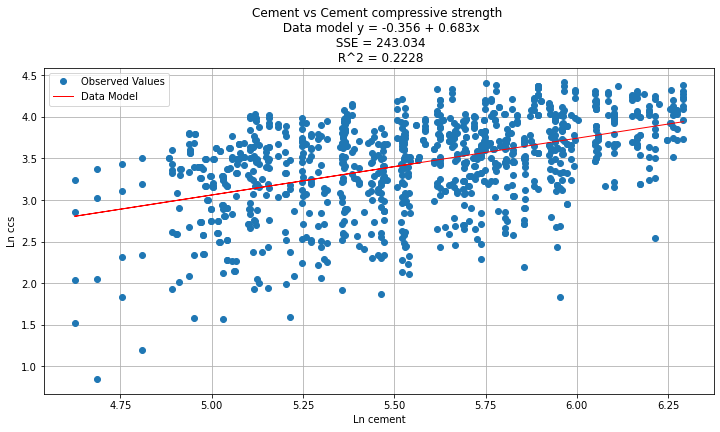

In [19]:
titleline = "Cement vs Cement compressive strength \n Data model y = " + str(round(beta0,3)) + " + " + str(round(beta1,3)) + "x" # put the model into the title
titleline = titleline + '\n SSE = ' + str(round(sse,4)) + '\n R^2 = ' + str(round(rsq,4)) 

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(df['lnX'], df['lnY'], 'o')           # scatter plot showing actual data
plt.plot(df['lnX'], y_pred11, 'r', linewidth=1)   # regression line
plt.xlabel('Ln cement')
plt.ylabel('Ln ccs')
plt.legend(['Observed Values','Data Model'])
plt.grid()
plt.title(titleline)

plt.show();

**From the above three models, the best R^2 value is of multiple linear regression. So we take multiple linear regression as our final model**

# Interface to allow users to enter concrete mixtures and return an estimated strength and an assessment of the uncertainty in the estimate

In [ ]:
# number of elements
n = int(input("Enter number of set of data : "))
print("please enter 2 diffrent numbers with a space in between") 

# Below line read inputs from user using map() function
a = list(map(float,input("\nenter the Cement (kg in a m^3 mixture) value : ").strip().split()))[:n]
b = list(map(float,input("\nenter the Blast Furnace Slag (kg in a m^3 mixture) value : ").strip().split()))[:n]
c = list(map(float,input("\nenter the Fly Ash (kg in a m^3 mixture) value : ").strip().split()))[:n]
d = list(map(float,input("\nenter the Water (kg in a m^3 mixture) value : ").strip().split()))[:n]
e = list(map(float,input("\nenter the Superplasticizer (kg in a m^3 mixture) value : ").strip().split()))[:n]
f = list(map(float,input("\nenter the Coarse Aggregate (kg in a m^3 mixture) value : ").strip().split()))[:n]
g = list(map(float,input("\nenter the Fine Aggregate (kg in a m^3 mixture) value : ").strip().split()))[:n]
h = list(map(float,input("\nenter the Age (day) value : ").strip().split()))[:n]

df2 = {'cement': a, 'superplasticizer': e, 'age': h}
userinput = pd.DataFrame(df2)
print("----------------------------------------------------")
userpred = pd.DataFrame({'cement compressive strength':lm.predict(userinput)})
print("the value of cement concrete strength is")
userpred

# Interface to allow users to add observations to the underlying database, and automatically update the Data Model to incorporate the new observations

In [ ]:
copydf = pd.read_csv("1330 concrete.csv")
#number of elements
n = int(input("Enter number of set of data : "))
print("please enter 2 diffrent numbers with a space in between") 

# Below line read inputs from user using map() function
a = list(map(float,input("\nenter the Cement (kg in a m^3 mixture) value : ").strip().split()))[:n]
b = list(map(float,input("\nenter the Blast Furnace Slag (kg in a m^3 mixture) value : ").strip().split()))[:n]
c = list(map(float,input("\nenter the Fly Ash (kg in a m^3 mixture) value : ").strip().split()))[:n]
d = list(map(float,input("\nenter the Water (kg in a m^3 mixture) value : ").strip().split()))[:n]
e = list(map(float,input("\nenter the Superplasticizer (kg in a m^3 mixture) value : ").strip().split()))[:n]
f = list(map(float,input("\nenter the Coarse Aggregate (kg in a m^3 mixture) value : ").strip().split()))[:n]
g = list(map(float,input("\nenter the Fine Aggregate (kg in a m^3 mixture) value : ").strip().split()))[:n]
h = list(map(float,input("\nenter the Age (day) value : ").strip().split()))[:n]
j = list(map(float,input("\nenter the Concrete compressive strength(MPa, megapascals) value : ").strip().split()))[:n]

for i in range(n):
    copydf.loc[len(copydf)+1] = [a[i], b[i], c[i], d[i], e[i], f[i], g[i], h[i], j[i]]
copydf

In [ ]:
newindep = copydf[['Cement (component 1)(kg in a m^3 mixture)' , 'Superplasticizer (component 5)(kg in a m^3 mixture)' , 'Age (day)']]
newdep = copydf['ccs']
lm1 = LinearRegression()
lm1.fit(newindep,newdep)

copydf_pred = lm1.predict(newindep)

plt.scatter(newdep, copydf_pred,color='r')
plt.plot([newdep.min(), newdep.max()], [copydf_pred.min(), copydf_pred.max()], color = 'black', lw=2)
plt.xlabel("ccs")
plt.ylabel("ccs pred")
plt.title("Predictions vs. actual values in the training set")

# Predicting the concrete strength for the given values

In [ ]:
predictordata = pd.DataFrame({'cement' : [175.0,320.0,320.0,320.0,530.0],
                              'blast furnace slag' : [13.0,0.0,0.0,73.0,359.0],
                              'FlyAsh' : [172.0,0.0,126.0,54.0,200.0],
                              'CoarseAggregate' : [1000.0,970.0,860.0,972.0,1145.0],
                              'FineAggregate' : [856.0,850.0,856.0,773.0,992.0],
                              'Water' : [156.0,192.0,209.0,181.0,247.0],
                              'superplasticizer' : [4.0,0.0,5.7,6.0,32.0],
                              'Age (day)' : [3.0,7.0,28.0,45.0,365.0]})
predictordata

In [ ]:
x1 = ['cement' , 'superplasticizer' , 'Age (day)']
X1 = predictordata[x]
ccspred = lm.predict(X1)
predictordata['ccs'] = ccspred   
predictordata